In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-04T01:29:53.796389+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

seaborn: 0.13.2
teeplot: 1.4.2
sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": 8,
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Alpha+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9311904907226562e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.12144851684570312}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.006837606430053711}
!!! {"init_...": 0.0005488395690917969}
!!! {"ete3Tree": 0.5495824813842773}
!!! {"GenomeTree_hierarchical": 0.0021810531616210938}
!!! {"mutateBranchETEhierarchy": 0.0918877124786377}
!!! {"write_genome_short": 0.04613494873046875}


  4%|▎         | 7/193 [00:01<00:26,  7.13it/s]

!!! {"writeGenomeNoIndels": 0.16815924644470215}
!!! {"pl.DataFrame": 0.04482412338256836}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.9159555435180664}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.01878809928894043}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033528804779052734}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012922286987304688}
!!! {"init_...": 0.00048661231994628906}
!!! {"ete3Tree": 7.581710815429688e-05}
!!! {"GenomeTree_hierarchical": 0.002057790756225586}
!!! {"mutateBranchETEhierarchy": 1.3828277587890625e-05}
!!! {"write_genome_short": 7.34329223632812

  7%|▋         | 13/193 [00:01<00:12, 14.05it/s]

!!! {"write_genome_short": 0.0005624294281005859}
!!! {"writeGenomeNoIndels": 1.1205673217773438e-05}
!!! {"pl.DataFrame": 8.821487426757812e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0052645206451416016}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002396106719970703}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=103, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0034024715423583984}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001354217529296875}
!!! {"init_...": 0.00044155120849609375}
!!! {"ete3Tree": 0.0007848739624023438}
!!! {"GenomeTree_hierarchical": 0.0020241737365722656}
!!! {"mutateBranchETEhierarchy": 0.0

 13%|█▎        | 26/193 [00:01<00:06, 25.52it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3365, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008317947387695312}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000125885009765625}
!!! {"init_...": 0.00047135353088378906}
!!! {"ete3Tree": 0.01939225196838379}
!!! {"GenomeTree_hierarchical": 0.0019381046295166016}
!!! {"mutateBranchETEhierarchy": 0.0045773983001708984}
!!! {"write_genome_short": 0.002293825149536133}
!!! {"writeGenomeNoIndels": 0.007649660110473633}
!!! {"pl.DataFrame": 0.0014450550079345703}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.03960108757019043}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000943422

 17%|█▋        | 33/193 [00:01<00:05, 31.61it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=60, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003259420394897461}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011491775512695312}
!!! {"init_...": 0.00041413307189941406}
!!! {"ete3Tree": 0.0003898143768310547}
!!! {"GenomeTree_hierarchical": 0.0025289058685302734}
!!! {"mutateBranchETEhierarchy": 8.344650268554688e-05}
!!! {"write_genome_short": 0.00011301040649414062}
!!! {"writeGenomeNoIndels": 0.00014352798461914062}
!!! {"pl.DataFrame": 0.00011610984802246094}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005414009094238281}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0

 24%|██▍       | 46/193 [00:02<00:03, 38.98it/s]

!!! {"write_genome_short": 0.0006849765777587891}
!!! {"writeGenomeNoIndels": 2.86102294921875e-05}
!!! {"pl.DataFrame": 0.0001430511474609375}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005539417266845703}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00034689903259277344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3540, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0086517333984375}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000141143798828125}
!!! {"init_...": 0.0005002021789550781}
!!! {"ete3Tree": 0.021045684814453125}
!!! {"GenomeTree_hierarchical": 0.0020186901092529297}
!!! {"mutateBranchETEhierarchy": 0.00499963

 31%|███       | 60/193 [00:02<00:02, 48.72it/s]

exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005851268768310547}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002613067626953125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003114461898803711}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010848045349121094}
!!! {"init_...": 0.0004410743713378906}
!!! {"ete3Tree": 5.9604644775390625e-05}
!!! {"GenomeTree_hierarchical": 0.0020749568939208984}
!!! {"mutateBranchETEhierarchy": 1.0251998901367188e-05}
!!! {"write_genome_short": 6.604194641113281e-05}
!!! {"writeGenomeNoIndels": 6.67572021484375e-06}
!!! {"pl.DataFrame": 7.77244

 35%|███▍      | 67/193 [00:02<00:02, 51.95it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0037581920623779297}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011706352233886719}
!!! {"init_...": 0.000423431396484375}
!!! {"ete3Tree": 0.00015664100646972656}
!!! {"GenomeTree_hierarchical": 0.002119302749633789}
!!! {"mutateBranchETEhierarchy": 3.147125244140625e-05}
!!! {"write_genome_short": 7.843971252441406e-05}
!!! {"writeGenomeNoIndels": 3.981590270996094e-05}
!!! {"pl.DataFrame": 9.655952453613281e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00480961799621582}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002079010009765625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_new

 38%|███▊      | 74/193 [00:02<00:02, 54.29it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00039196014404296875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=251, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003543853759765625}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010395050048828125}
!!! {"init_...": 0.0004127025604248047}
!!! {"ete3Tree": 0.001598358154296875}
!!! {"GenomeTree_hierarchical": 0.0020821094512939453}
!!! {"mutateBranchETEhierarchy": 0.00036525726318359375}
!!! {"write_genome_short": 0.00028228759765625}
!!! {"writeGenomeNoIndels": 0.0006182193756103516}
!!! {"pl.DataFrame": 0.0001919269561767578}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.007176876068115234}
enter log_context_duration for

 41%|████▏     | 80/193 [00:03<00:04, 26.24it/s]

!!! {"mutateBranchETEhierarchy": 0.4088289737701416}
!!! {"write_genome_short": 0.00142669677734375}
!!! {"writeGenomeNoIndels": 0.003354310989379883}
!!! {"pl.DataFrame": 0.0006880760192871094}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.4266371726989746}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005865097045898438}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=683, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004406929016113281}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013780593872070312}
!!! {"init_...": 0.0004665851593017578}
!!! {"ete3Tree": 0.0039806365966796875}
!!! {"GenomeTree_hierarchical": 0.002106666564

 47%|████▋     | 90/193 [00:03<00:03, 28.45it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003331422805786133}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011515617370605469}
!!! {"init_...": 0.0004391670227050781}
!!! {"ete3Tree": 6.270408630371094e-05}
!!! {"GenomeTree_hierarchical": 0.002550840377807617}
!!! {"mutateBranchETEhierarchy": 1.1205673217773438e-05}
!!! {"write_genome_short": 7.963180541992188e-05}
!!! {"writeGenomeNoIndels": 6.67572021484375e-06}
!!! {"pl.DataFrame": 8.249282836914062e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004895687103271484}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002233

 53%|█████▎    | 102/193 [00:03<00:02, 35.86it/s]

!!! {"phastSimRun": 0.00011730194091796875}
!!! {"init_...": 0.0005536079406738281}
!!! {"ete3Tree": 7.319450378417969e-05}
!!! {"GenomeTree_hierarchical": 0.0022084712982177734}
!!! {"mutateBranchETEhierarchy": 1.2636184692382812e-05}
!!! {"write_genome_short": 7.152557373046875e-05}
!!! {"writeGenomeNoIndels": 9.775161743164062e-06}
!!! {"pl.DataFrame": 9.036064147949219e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00525212287902832}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00022268295288085938}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003181934356689453}
enter log_context_duration for _

 59%|█████▉    | 114/193 [00:03<00:01, 44.17it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003682374954223633}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001327991485595703}
!!! {"init_...": 0.00045418739318847656}
!!! {"ete3Tree": 8.344650268554688e-05}
!!! {"GenomeTree_hierarchical": 0.0028183460235595703}
!!! {"mutateBranchETEhierarchy": 1.6689300537109375e-05}
!!! {"write_genome_short": 9.369850158691406e-05}
!!! {"writeGenomeNoIndels": 1.3113021850585938e-05}
!!! {"pl.DataFrame": 0.00016689300537109375}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0059261322021484375}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002741813659667969}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd

 62%|██████▏   | 120/193 [00:03<00:01, 46.38it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0036361217498779297}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001480579376220703}
!!! {"init_...": 0.000514984130859375}
!!! {"ete3Tree": 8.177757263183594e-05}
!!! {"GenomeTree_hierarchical": 0.002408742904663086}
!!! {"mutateBranchETEhierarchy": 1.6689300537109375e-05}
!!! {"write_genome_short": 9.179115295410156e-05}
!!! {"writeGenomeNoIndels": 7.867813110351562e-06}
!!! {"pl.DataFrame": 0.000141143798828125}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005201816558837891}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00033164

 69%|██████▉   | 133/193 [00:04<00:01, 50.56it/s]

!!! {"phastSimRun": 0.00013327598571777344}
!!! {"init_...": 0.0005819797515869141}
!!! {"ete3Tree": 0.0001900196075439453}
!!! {"GenomeTree_hierarchical": 0.003293275833129883}
!!! {"mutateBranchETEhierarchy": 3.8623809814453125e-05}
!!! {"write_genome_short": 0.00011181831359863281}
!!! {"writeGenomeNoIndels": 5.316734313964844e-05}
!!! {"pl.DataFrame": 0.00010824203491210938}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00714421272277832}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00025653839111328125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031752586364746094}
enter log_context_duration for

 76%|███████▌  | 146/193 [00:04<00:00, 53.92it/s]

!!! {"write_genome_short": 0.0006055831909179688}
!!! {"writeGenomeNoIndels": 1.1205673217773438e-05}
!!! {"pl.DataFrame": 9.632110595703125e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0062024593353271484}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00024628639221191406}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=22, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003177642822265625}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001201629638671875}
!!! {"init_...": 0.0004546642303466797}
!!! {"ete3Tree": 0.00017881393432617188}
!!! {"GenomeTree_hierarchical": 0.0021550655364990234}
!!! {"mutateBranchETEhierarchy": 3.8146

 79%|███████▉  | 152/193 [00:04<00:00, 41.37it/s]

!!! {"ete3Tree": 0.02734971046447754}
!!! {"GenomeTree_hierarchical": 0.0020749568939208984}
!!! {"mutateBranchETEhierarchy": 0.007195711135864258}
!!! {"write_genome_short": 0.0033593177795410156}
!!! {"writeGenomeNoIndels": 0.010572433471679688}
!!! {"pl.DataFrame": 0.0020852088928222656}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.055385589599609375}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0011913776397705078}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=4147, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.009179353713989258}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013685226440429688}
!!! {"init_...": 0.0004928

 81%|████████▏ | 157/193 [00:04<00:00, 41.14it/s]

!!! {"write_genome_short": 0.0003616809844970703}
!!! {"writeGenomeNoIndels": 8.821487426757812e-06}
!!! {"pl.DataFrame": 0.00010919570922851562}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005465507507324219}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00027871131896972656}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2375, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.007226705551147461}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015044212341308594}
!!! {"init_...": 0.0005016326904296875}
!!! {"ete3Tree": 0.013945817947387695}
!!! {"GenomeTree_hierarchical": 0.0020487308502197266}
!!! {"mutateBranchETEhierarchy": 0.00

 84%|████████▍ | 162/193 [00:06<00:02, 11.77it/s]

!!! {"mutateBranchETEhierarchy": 0.449615478515625}
!!! {"write_genome_short": 0.0237576961517334}
!!! {"writeGenomeNoIndels": 0.07401299476623535}
!!! {"pl.DataFrame": 0.01573014259338379}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.7447102069854736}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.005967617034912109}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003264188766479492}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013637542724609375}
!!! {"init_...": 0.0004909038543701172}
!!! {"ete3Tree": 8.678436279296875e-05}
!!! {"GenomeTree_hierarchical": 0.002653837203979492}


 86%|████████▌ | 166/193 [00:06<00:01, 13.96it/s]

!!! {"write_genome_short": 0.0009069442749023438}
!!! {"writeGenomeNoIndels": 0.0014715194702148438}
!!! {"pl.DataFrame": 0.0004062652587890625}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.013129472732543945}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004932880401611328}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=1503, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.005466461181640625}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012612342834472656}
!!! {"init_...": 0.00045180320739746094}
!!! {"ete3Tree": 0.008183479309082031}
!!! {"GenomeTree_hierarchical": 0.0027246475219726562}
!!! {"mutateBranchETEhierarchy": 0.00204

 92%|█████████▏| 178/193 [00:06<00:00, 21.40it/s]

!!! {"ete3Tree": 0.06392455101013184}
!!! {"GenomeTree_hierarchical": 0.002099752426147461}
!!! {"mutateBranchETEhierarchy": 0.015484809875488281}
!!! {"write_genome_short": 0.007553815841674805}
!!! {"writeGenomeNoIndels": 0.025368452072143555}
!!! {"pl.DataFrame": 0.00491023063659668}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12206220626831055}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.002371549606323242}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032324790954589844}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012993812561035156}
!!! {"init_...": 0.00048017501831054

 95%|█████████▍| 183/193 [00:06<00:00, 25.21it/s]

!!! {"init_...": 0.0009412765502929688}
!!! {"ete3Tree": 0.009614229202270508}
!!! {"GenomeTree_hierarchical": 0.001994609832763672}
!!! {"mutateBranchETEhierarchy": 0.0022203922271728516}
!!! {"write_genome_short": 0.0012171268463134766}
!!! {"writeGenomeNoIndels": 0.003628253936767578}
!!! {"pl.DataFrame": 0.0007369518280029297}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.02213740348815918}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005548000335693359}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003095865249633789}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012636184

100%|██████████| 193/193 [00:06<00:00, 28.10it/s]

exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.06416010856628418}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0013713836669921875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032134056091308594}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001316070556640625}
!!! {"init_...": 0.00045943260192871094}
!!! {"ete3Tree": 7.343292236328125e-05}
!!! {"GenomeTree_hierarchical": 0.0025484561920166016}
!!! {"mutateBranchETEhierarchy": 1.4066696166992188e-05}
!!! {"write_genome_short": 7.557868957519531e-05}
!!! {"writeGenomeNoIndels": 7.3909759521484375e-06}
!!! {"pl.DataFrame": 0.000113

exit log_context_duration for extract variant
!!! {"extract variant": 0.09414887428283691}
enter log_context_duration for prepend sequence
exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.26290321350097656}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.03163957595825195}
enter log_context_duration for _add_sequence_diffs


 29%|██▊       | 2/7 [00:00<00:00, 19.99it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003282785415649414}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03323841094970703}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.01288461685180664}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003313779830932617}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03310203552246094}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002725839614868164}
enter log_context_duration for seq_arr


100%|██████████| 7/7 [00:00<00:00, 22.63it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.033241987228393555}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002585172653198242}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0034482479095458984}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03329348564147949}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0037801265716552734}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0014939308166503906}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mi

exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.2522885799407959}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 35
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': 8,
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 36
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


exit log_context_duration for alifestd_mark_clade_subtended_duration_ratio_sister_asexual
!!! {"alifestd_mark_clade_subtended_duration_ratio_sister_asexual": 0.1899428367614746}
enter log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual



100%|██████████| 3751/3751 [00:25<00:00, 148.53it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 27.06353187561035}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 3751/3751 [00:04<00:00, 912.38it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 120.12119722366333}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.06837224960327148}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 179.7419354915619}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.009503364562988281}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003452301025390625}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.0004029273986816406}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0003993511199951172}
ancestral_s


100%|██████████| 368/368 [00:00<00:00, 312893.55it/s]

process mutations:   0%|          | 1/368 [00:00<01:13,  4.97it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:14<11:28,  1.91s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   16.5s



process mutations:  13%|█▎        | 48/368 [00:52<05:35,  1.05s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   57.7s



process mutations:  24%|██▍       | 88/368 [01:31<04:42,  1.01s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.6min



process mutations:  35%|███▍      | 128/368 [02:10<03:58,  1.01it/s]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  2.3min



process mutations:  46%|████▌     | 168/368 [02:48<03:16,  1.02it/s]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.0min



process mutations:  57%|█████▋    | 208/368 [03:27<02:36,  1.02it/s]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  3.6min



process mutations:  67%|██████▋   | 248/368 [04:07<01:57,  1.02it/s]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  4.3min



process mutations:  78%|███████▊  | 288/368 [04:46<01:18,  1.02it/s]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  5.0min



process mutations:  89%|████████▉ | 328/368 [05:25<00:39,  1.02it/s]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  5.7min



process mutations: 100%|██████████| 368/368 [06:07<00:00,  1.00it/s]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  6.1min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  6.3min finished


process replicate: 100%|██████████| 1/1 [09:21<00:00, 561.22s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.0770101547241211}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 109
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> 'a651df39-2c12-81c0-8ddb-f695434f98d8', 'a651df39-2c12-81c0-8ddb-f695434f98d8', 'a651df39-2c12-81c0-8ddb-f69543
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ phylo_df_background_len        <u16> 7287, 7388, 7286, 7388, 6272
$ phyo_df_screened_len           <u16> 215, 114, 216, 114, 1230
$ tb_stat                        <cat> clade duration ratio, clade duration ratio, 

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


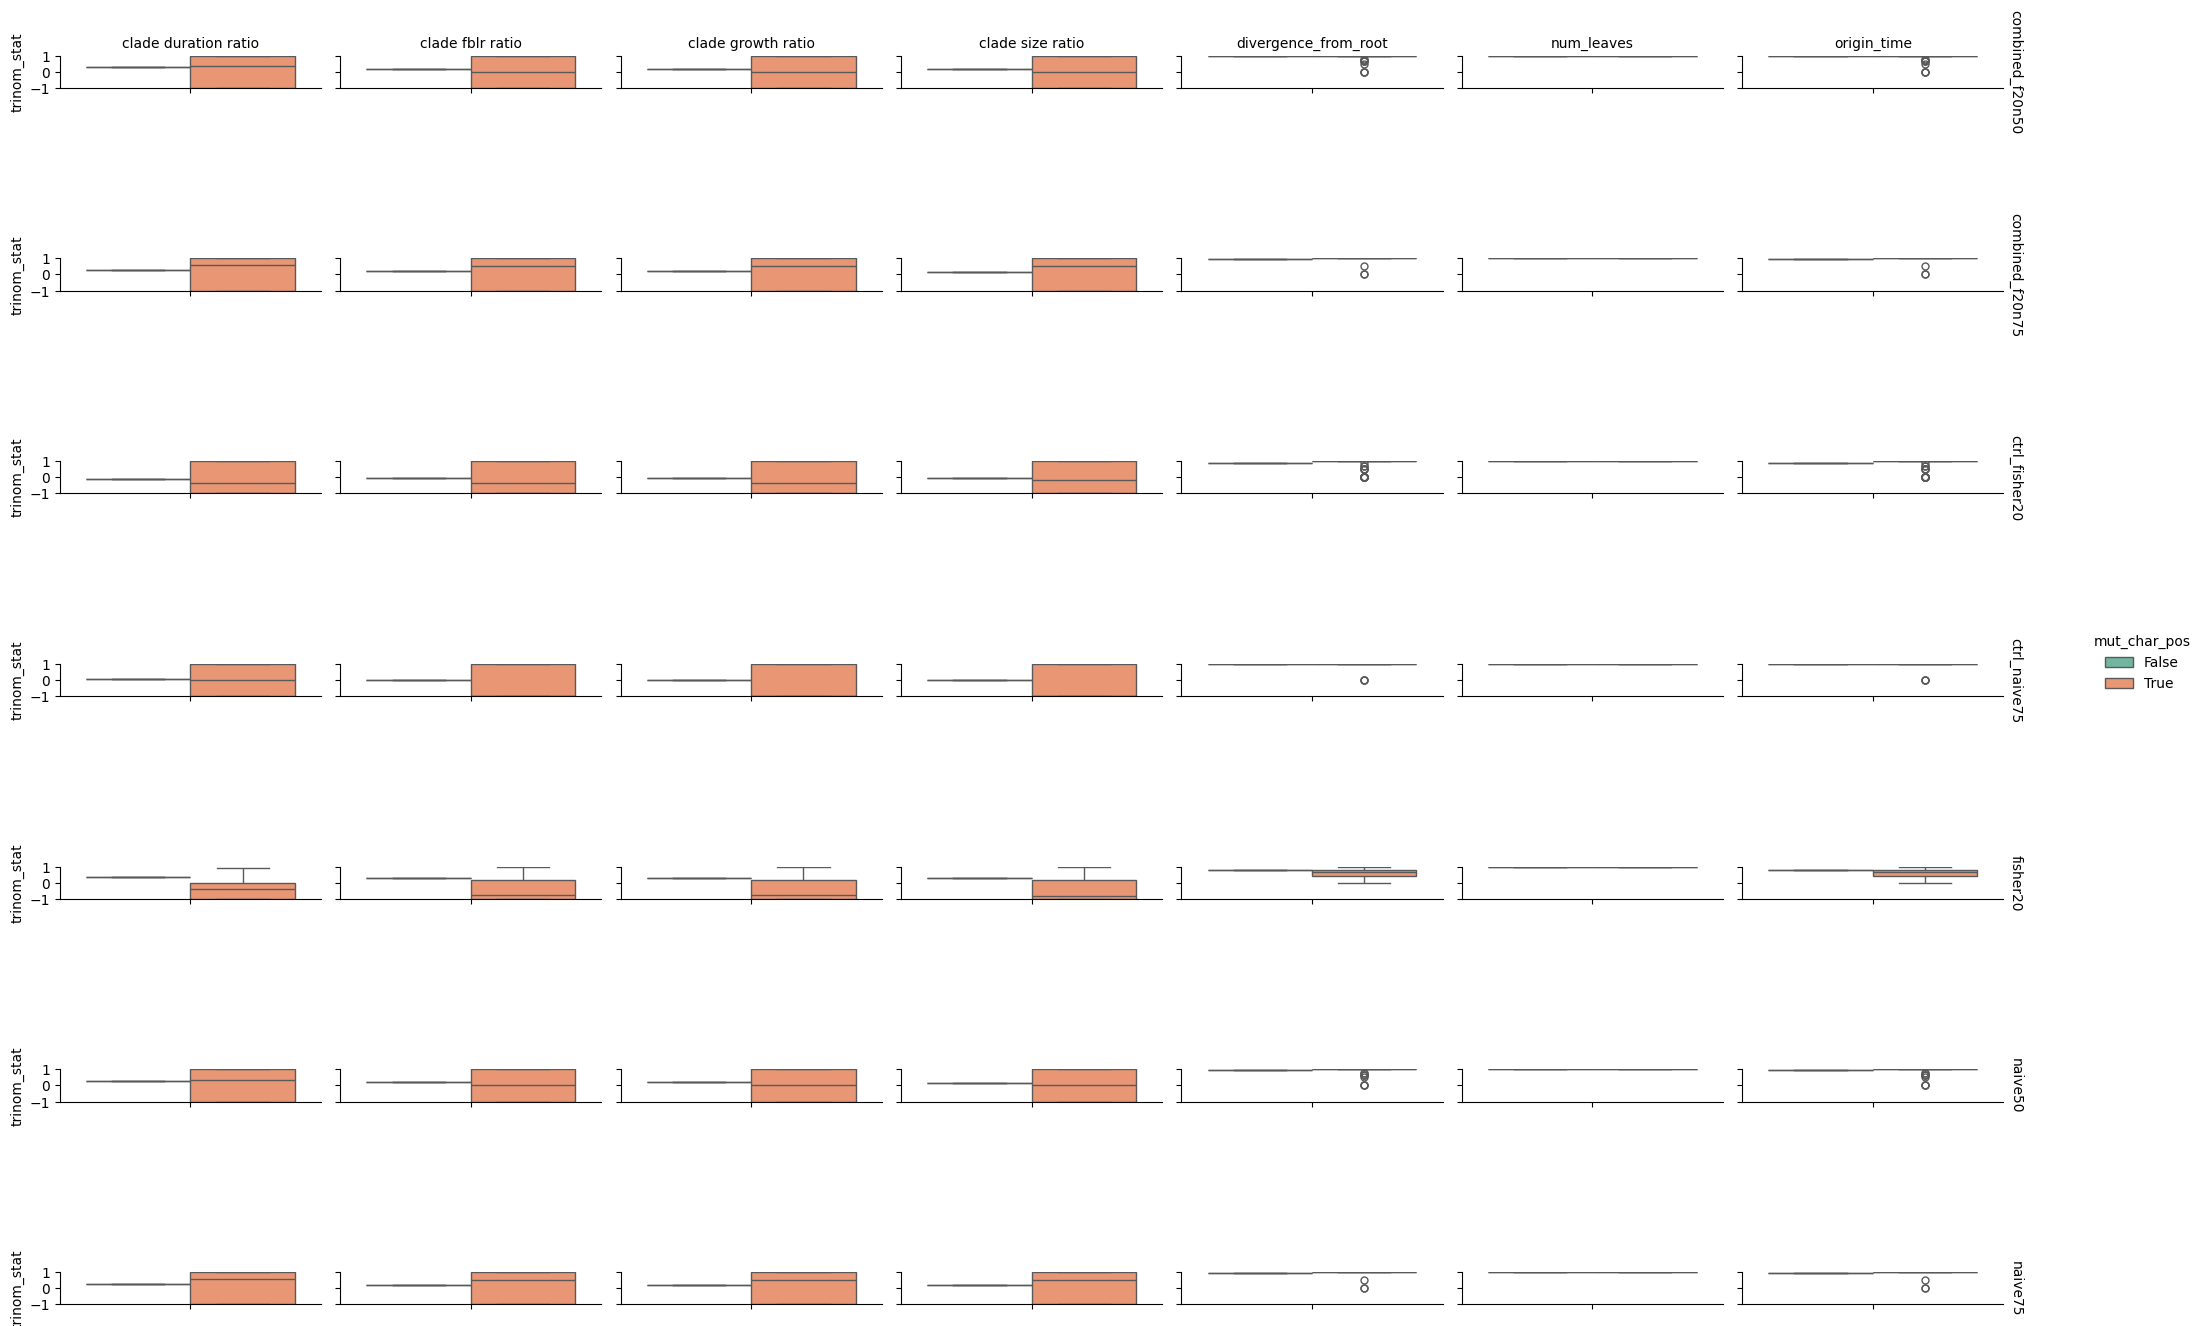

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


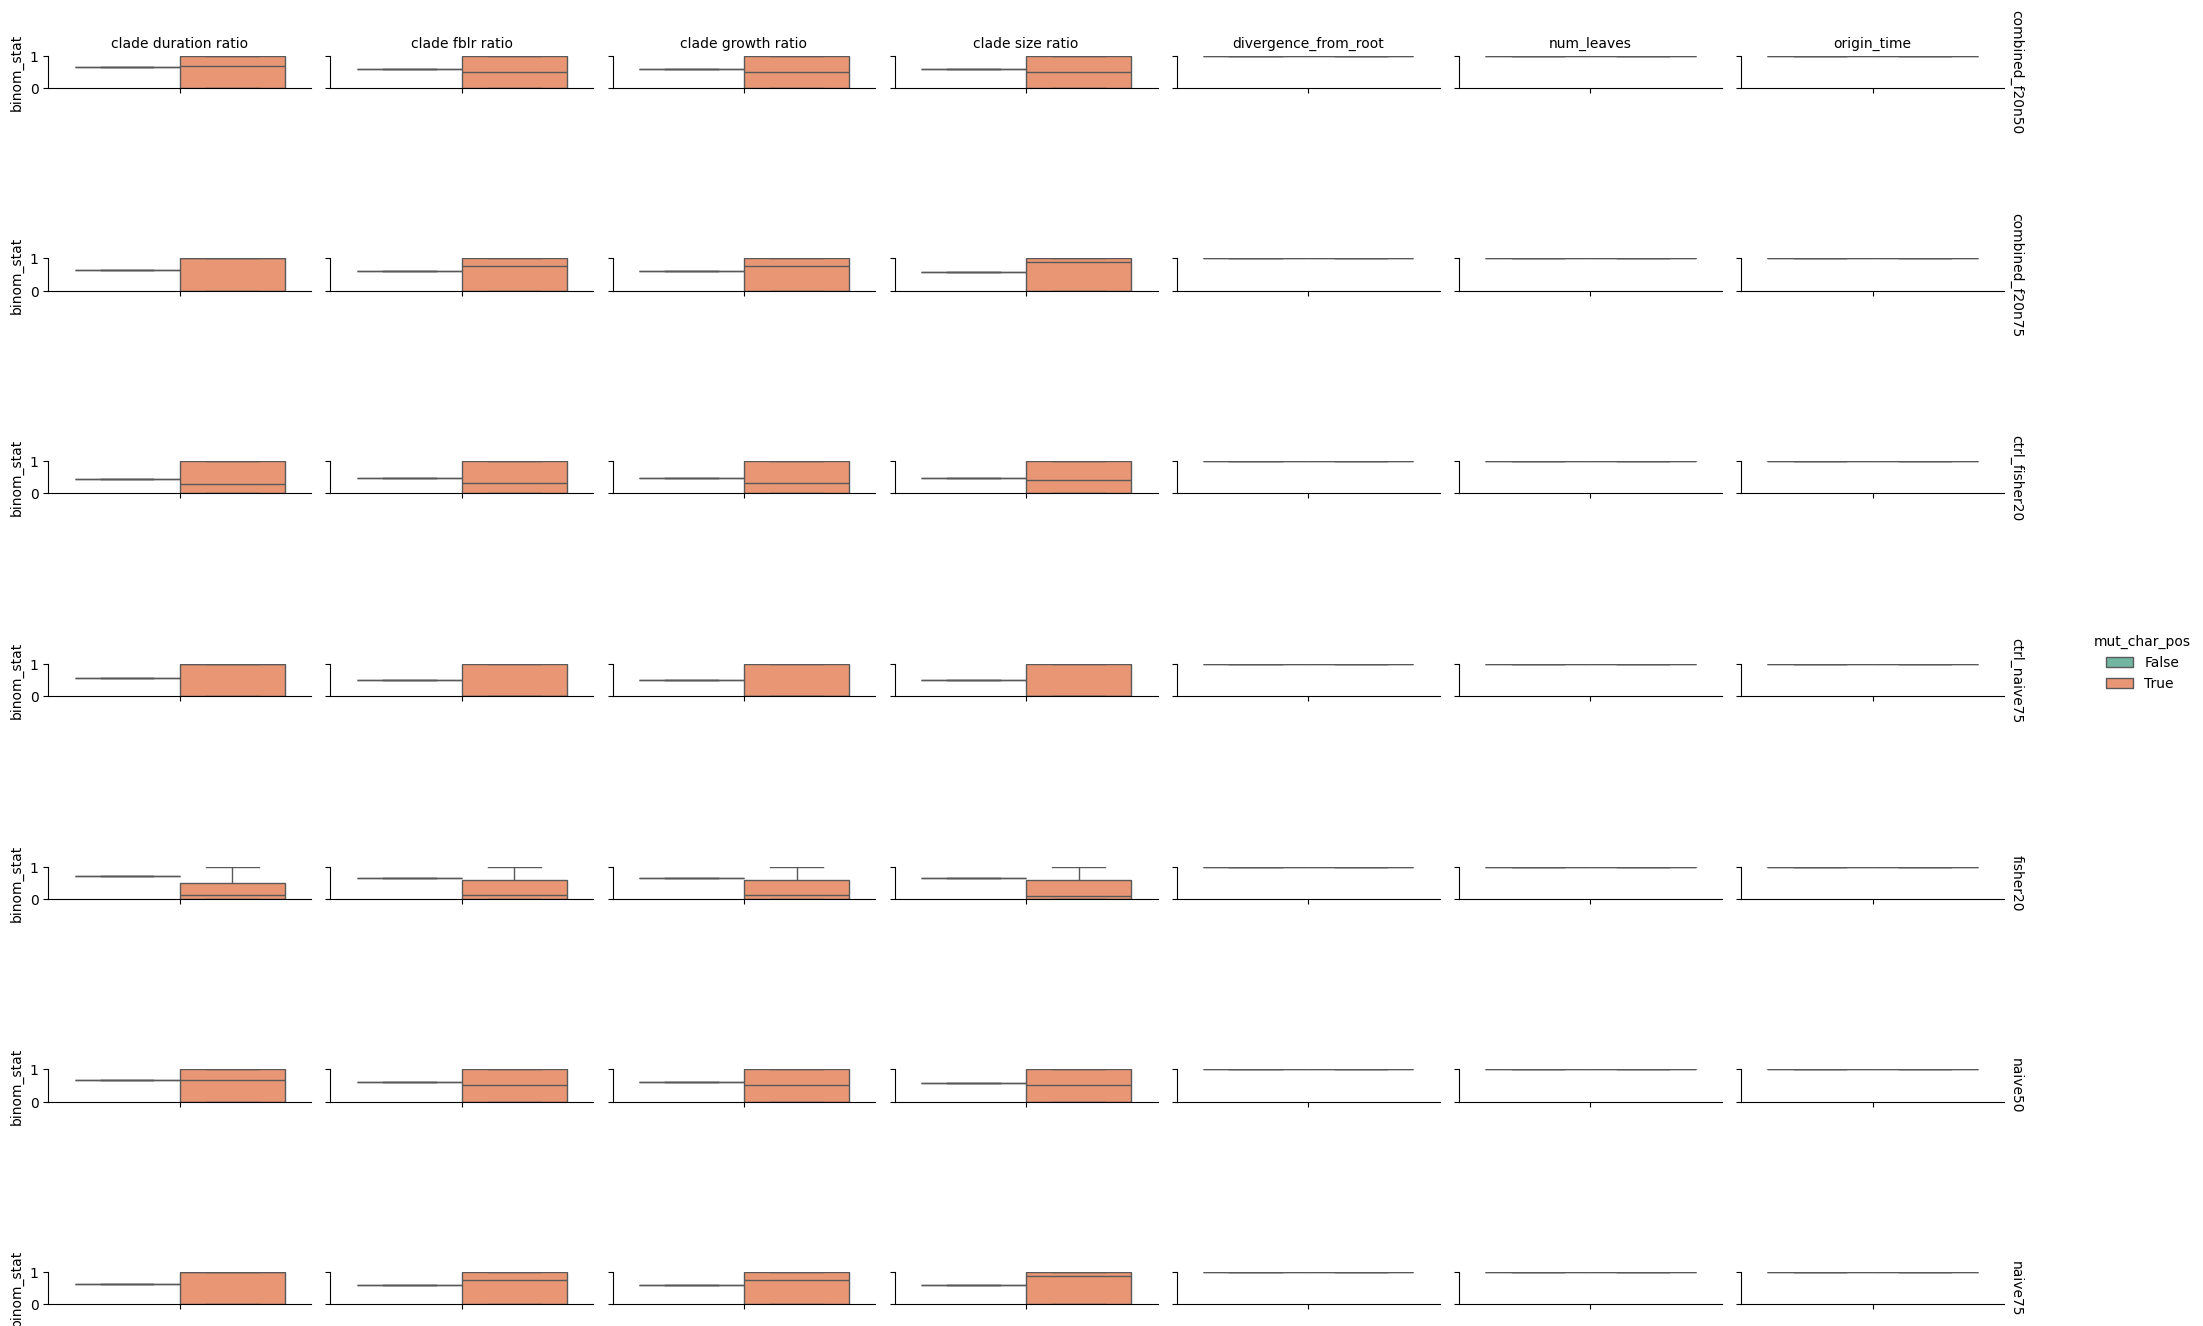

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


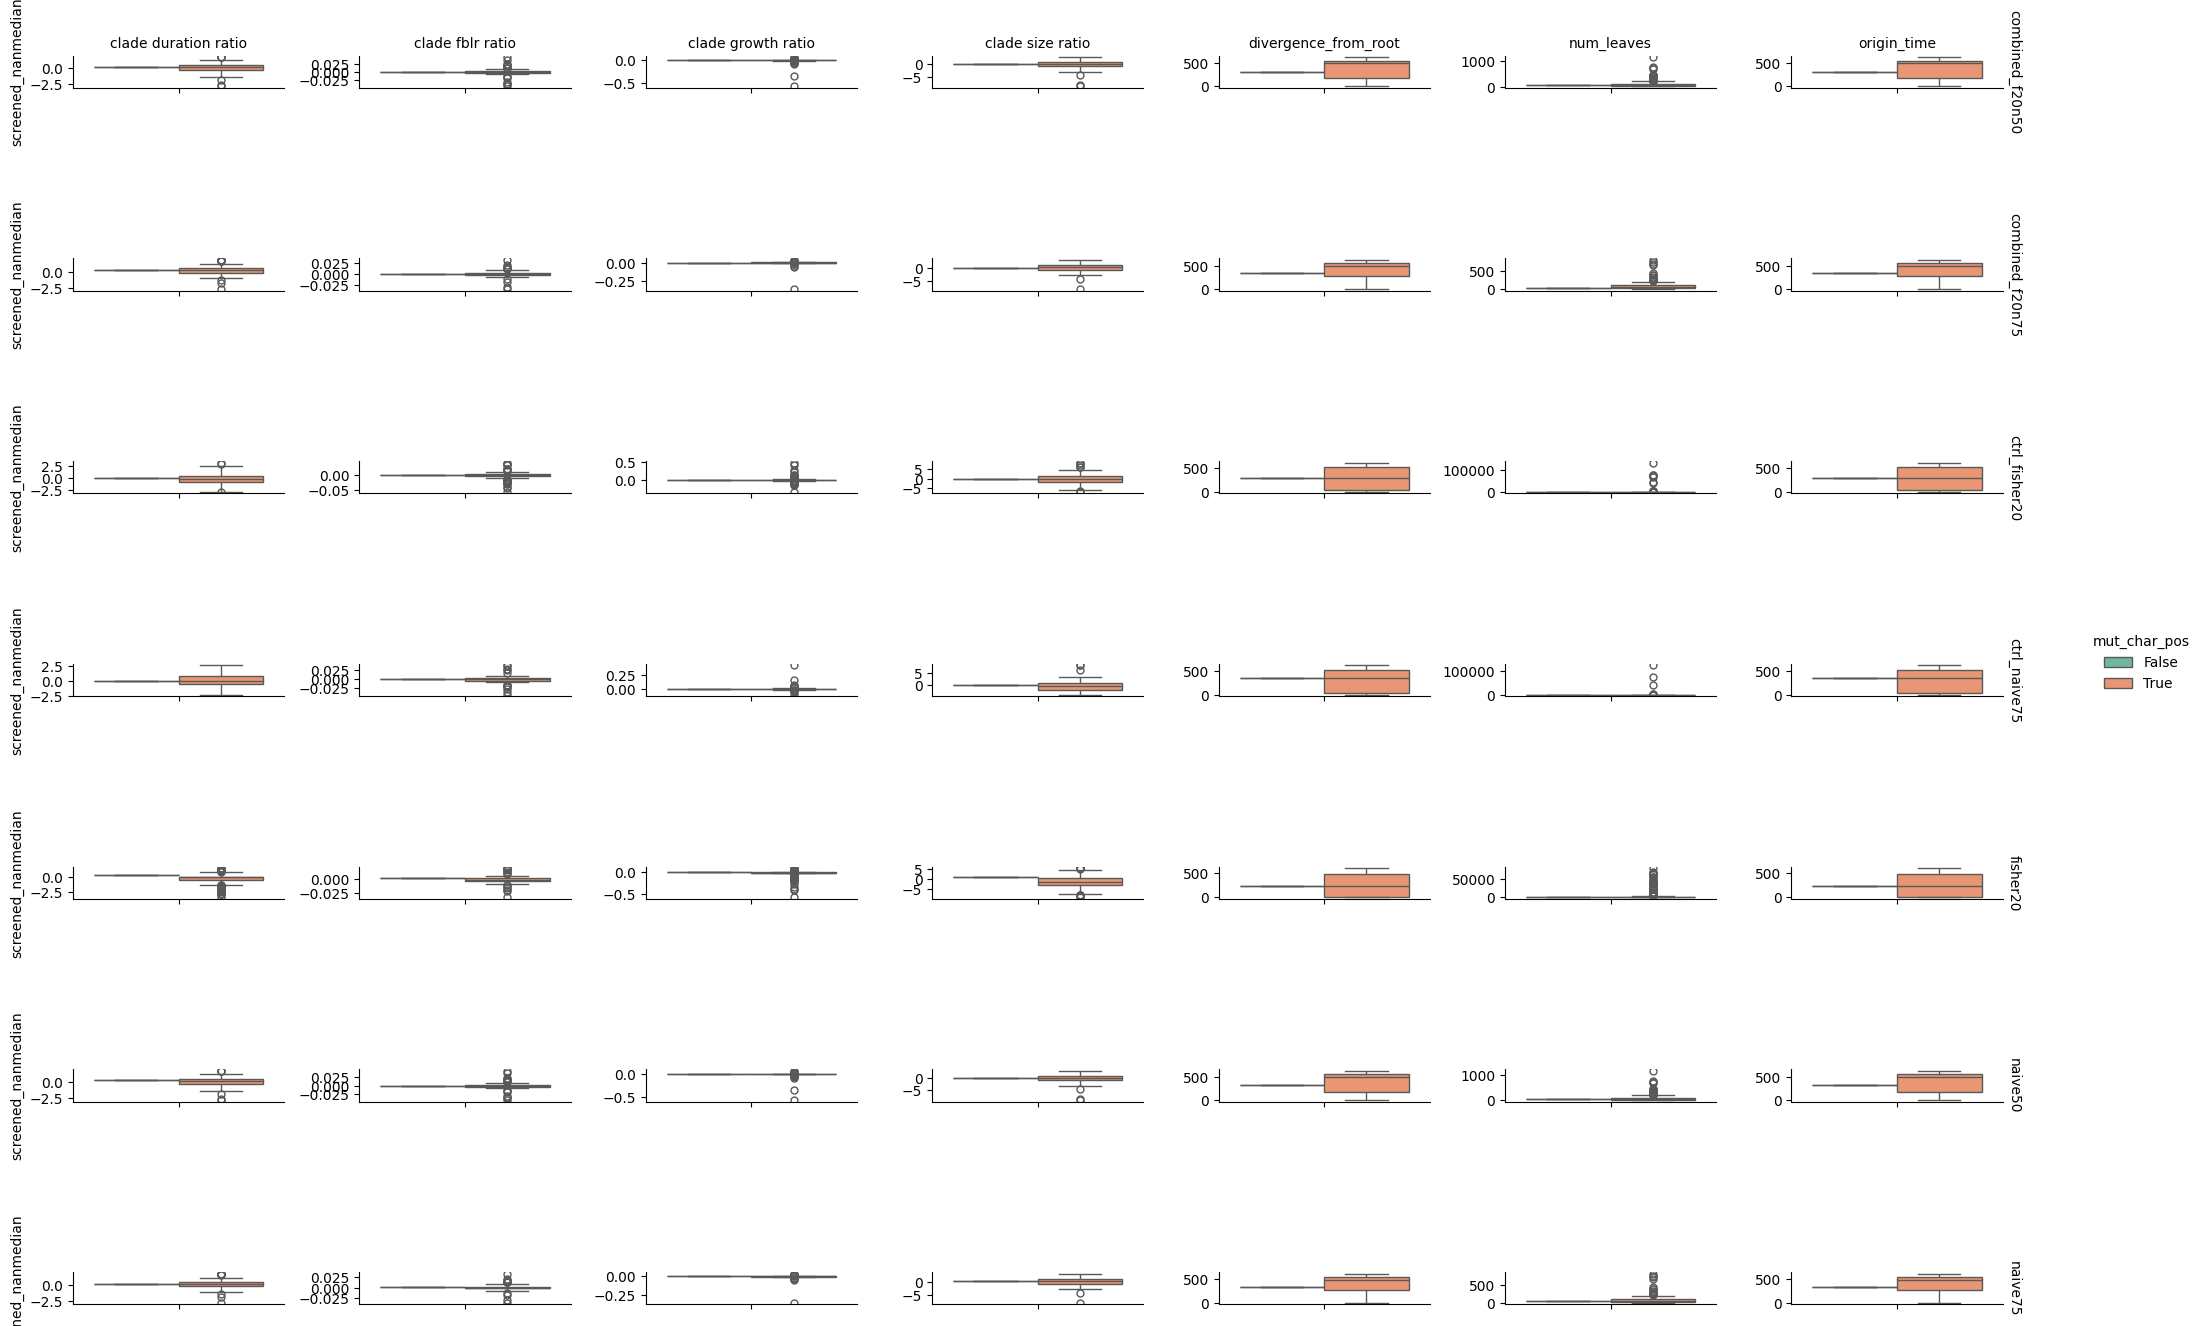

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


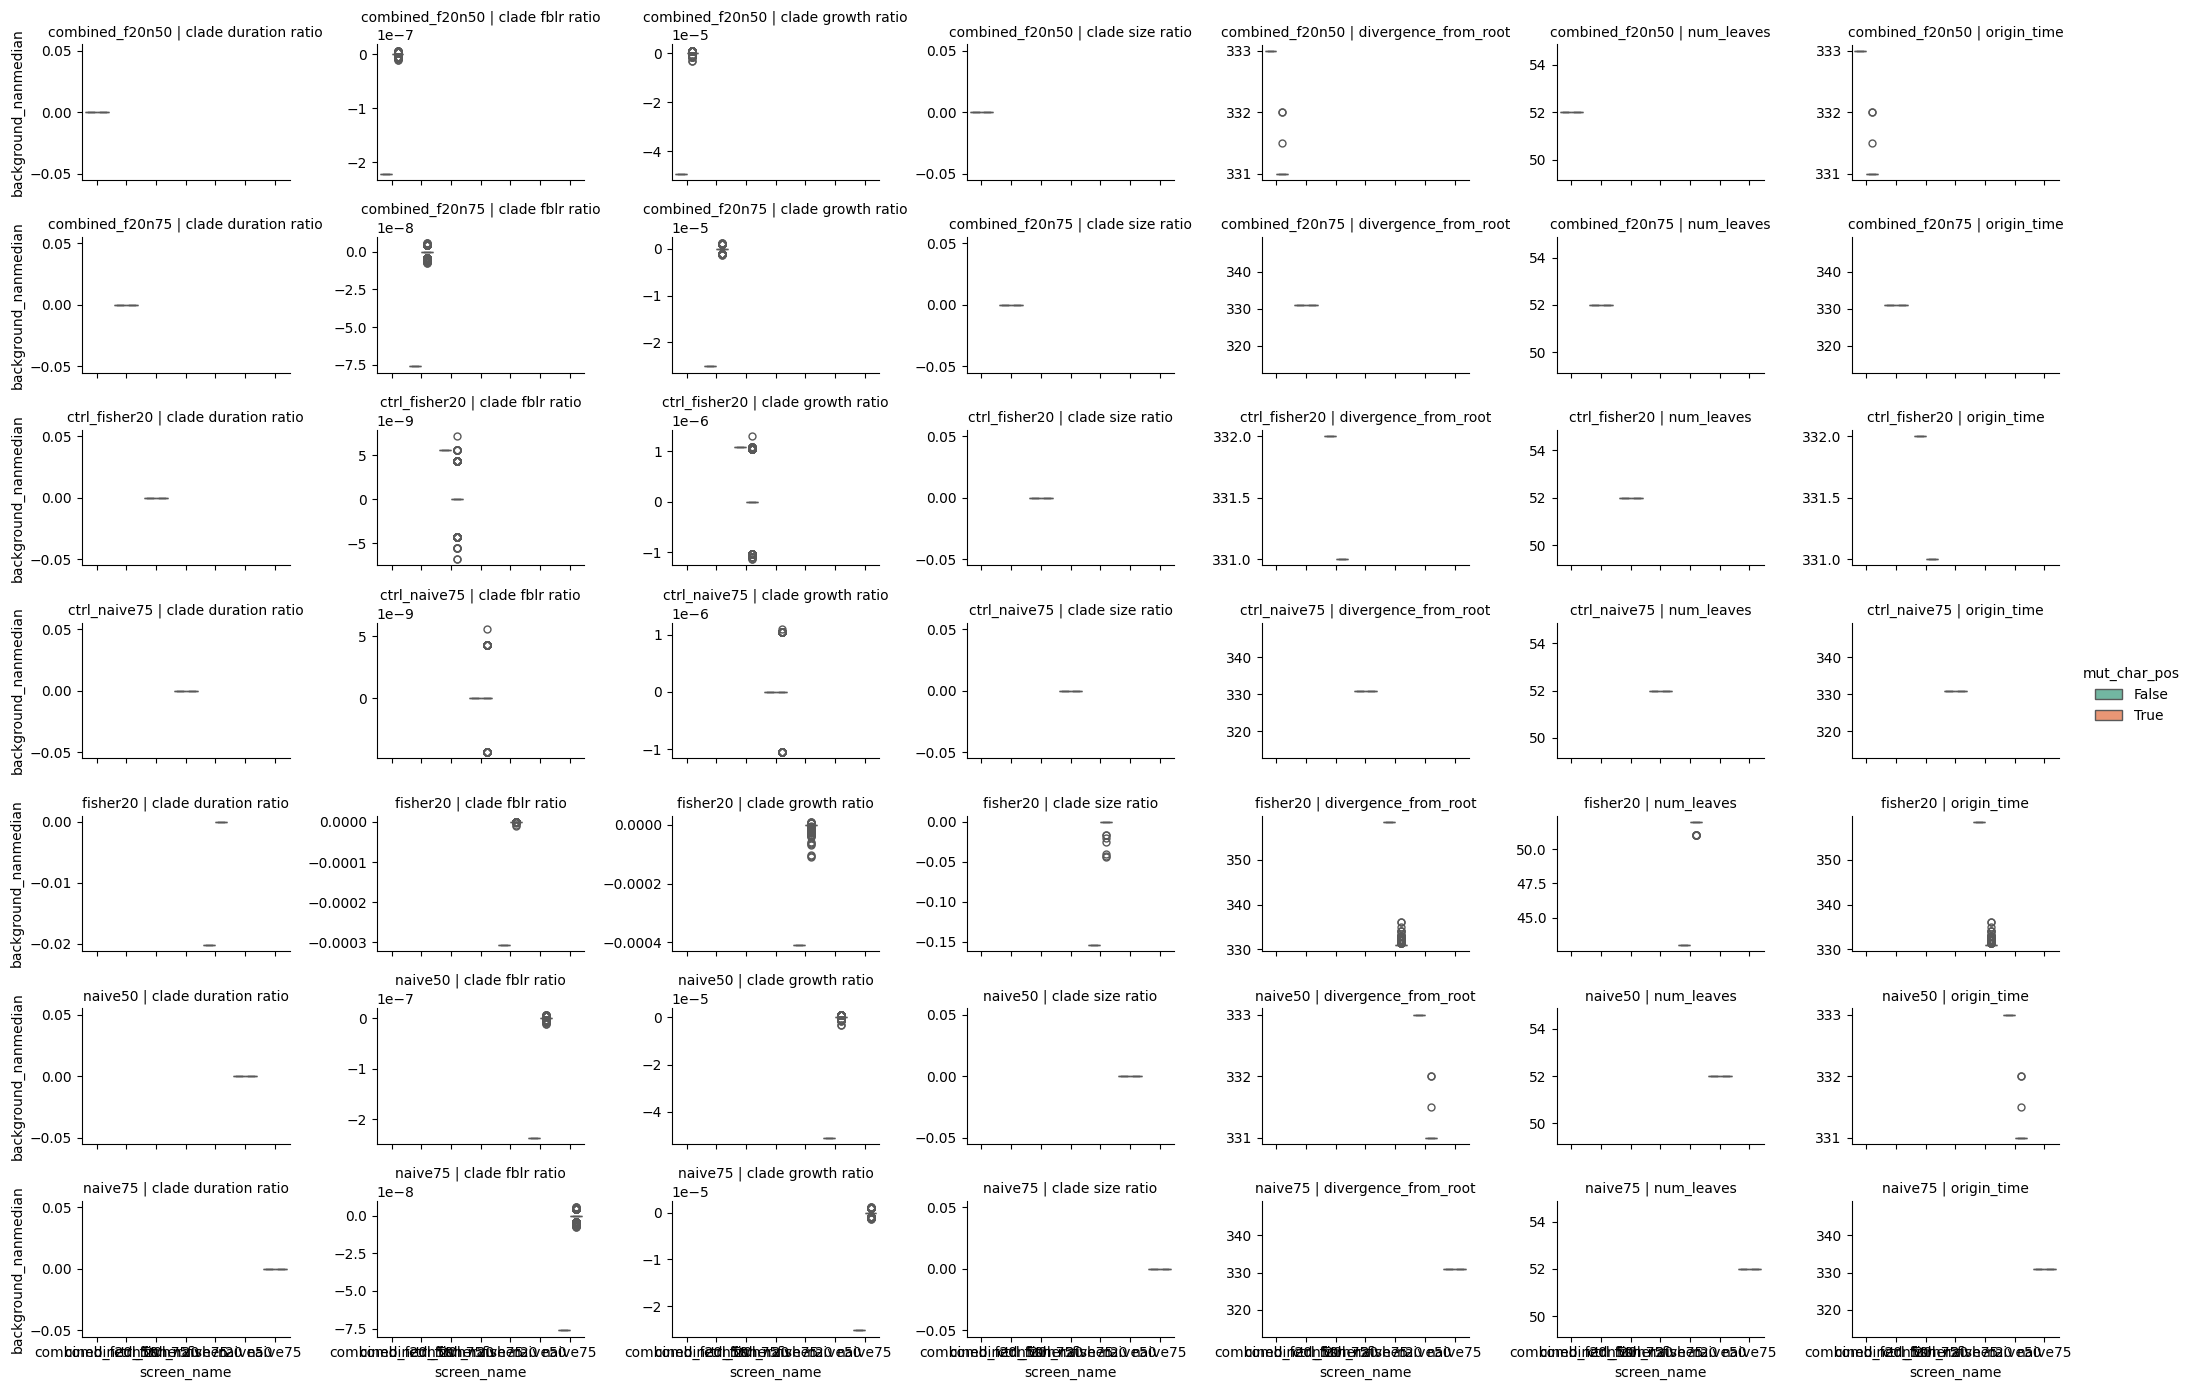

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
